In [13]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [14]:
FULL_DATASET_NAME = 'data/landing_club/accepted_2007_to_2018Q4.csv'
SMALL_SAMPLE_DATASET_NAME = 'data/landing_club/accepted_2007_to_2018Q4_small_sample.csv'
SMALL_HEAD_DATASET_NAME = 'data/landing_club/accepted_2007_to_2018Q4_small_head.csv'
MEDIUM_SAMPLE_DATASET_NAME = 'data/landing_club/accepted_2007_to_2018Q4_medium_sample.csv'
MEDIUM_HEAD_DATASET_NAME = 'data/landing_club/accepted_2007_to_2018Q4_medium_head.csv'
USED_DATASET_NAME = MEDIUM_HEAD_DATASET_NAME

In [67]:
COL_NAMES = ['loan_amnt', 'home_ownership', 'annual_inc', 'grade', 'int_rate']
FEATURE_NAMES = ['loan_amnt', 'home_ownership', 'annual_inc', 'grade']
LABEL_NAME = 'int_rate'
record_count = 10000
# acc_raw_df = pd.read_csv(FULL_DATASET_NAME)
# acc_raw_df = pd.read_csv(FULL_DATASET_NAME, usecols = COL_NAMES)
# acc_raw_df.sample(record_count).to_csv(SMALL_SAMPLE_DATASET_NAME, columns=COL_NAMES)
# acc_raw_df.head(record_count).to_csv(SMALL_HEAD_DATASET_NAME, columns=COL_NAMES)
# acc_raw_df.sample(record_count).to_csv(MEDIUM_SAMPLE_DATASET_NAME, columns=COL_NAMES)
# acc_raw_df.head(record_count).to_csv(MEDIUM_HEAD_DATASET_NAME, columns=COL_NAMES)

In [16]:
# from landing_club_dataset import Landing_Club_Dataset
# dataset = Landing_Club_Dataset(USED_DATASET_NAME, LABEL_NAME, COL_NAMES)
# dataset.X_df

In [25]:

df = pd.read_csv(FULL_DATASET_NAME, nrows=10000, skiprows=range(1, 20000), low_memory=False)
print(len(df))


10000


In [18]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [26]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,66605608,NaN,17000.0,17000.0,17000.0,60 months,13.18,388.38,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,67395643,NaN,9000.0,9000.0,9000.0,36 months,12.59,301.48,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,67235658,NaN,7000.0,7000.0,7000.0,36 months,6.24,213.72,A,A2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,67425741,NaN,1925.0,1925.0,1925.0,36 months,11.22,63.23,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,66574632,NaN,8000.0,8000.0,8000.0,36 months,12.59,267.98,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df['grade'].describe()

count     10000
unique        7
top           B
freq       3004
Name: grade, dtype: object

In [28]:
df['grade'].value_counts()

B    3004
C    2830
A    1770
D    1398
E     755
F     203
G      40
Name: grade, dtype: int64

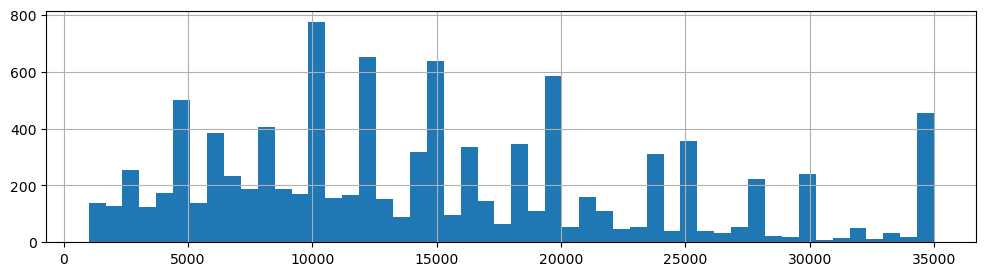

In [29]:
df['loan_amnt'].hist(bins=50, figsize=(12, 3))
plt.show()

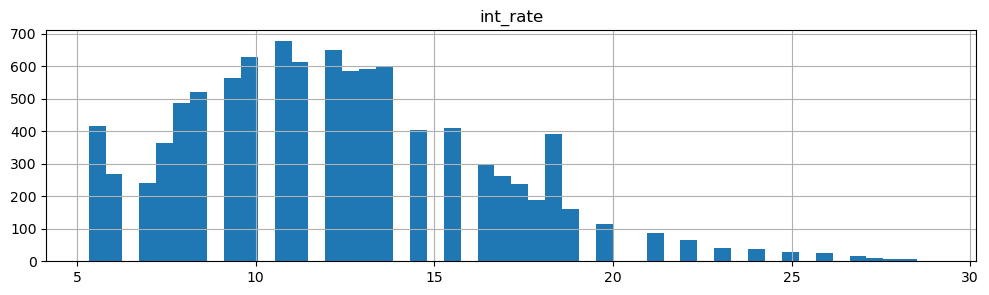

In [30]:
# df[['int_rate', 'grade']].head()
df[['int_rate']].hist(bins=50, figsize=(12, 3))
plt.show()

<BarContainer object of 7 artists>

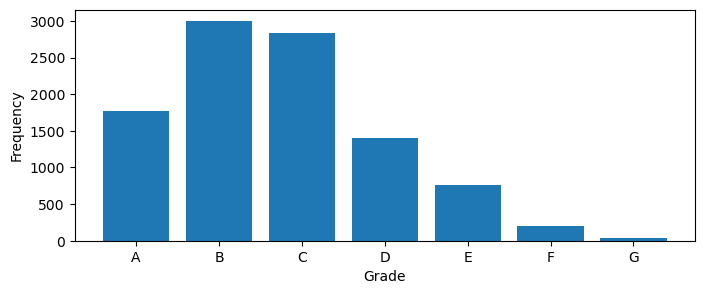

In [31]:
# df['grade'].hist(bins=14, figsize=(12, 3))
# plt.show()
grade_valuecounts = df['grade'].value_counts().sort_index()
plt.figure(figsize=(8,3))
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.bar(grade_valuecounts.index, grade_valuecounts)
# grade_valuecounts.index

In [55]:
cat_codes = pd.Categorical(df['grade']).codes
df1 = df.loc[:,['int_rate', 'grade']]
df1['grad_cat'] = cat_codes
df1.head()


,int_rate,grade,grad_cat
0,13.18,C,2
1,12.59,C,2
2,6.24,A,0
3,11.22,B,1
4,12.59,C,2


In [57]:
dfnn = df.fillna(0)
grade_codes = pd.Categorical(df['grade']).codes
dfnn['grade_cat'] = grade_codes
corr_matrix = dfnn.corr(numeric_only=True)
corr_matrix.head(10)
corr_matrix['int_rate'].sort_values(ascending=False).head(19)

int_rate                   1.000000
grade_cat                  0.972902
total_rec_int              0.448477
num_tl_op_past_12m         0.269094
inq_last_6mths             0.246522
acc_open_past_24mths       0.227968
percent_bc_gt_75           0.207212
dti                        0.203588
bc_util                    0.201293
revol_util                 0.199202
collection_recovery_fee    0.196960
recoveries                 0.196761
out_prncp                  0.167685
out_prncp_inv              0.167478
funded_amnt                0.153034
loan_amnt                  0.153034
funded_amnt_inv            0.151655
installment                0.125856
settlement_amount          0.103922
Name: int_rate, dtype: float64

In [64]:
dfnn.loc[:, ['int_rate', 'grade']].groupby(['grade']).mean()

,int_rate
grade,
A,6.774147
B,9.905083
C,13.064322
D,16.649313
E,19.038874
F,23.522020
G,27.427000


In [68]:
[0.1]*5

[0.1, 0.1, 0.1, 0.1, 0.1]